<div style="text-align: right;"><h4>ФБ-21 Редько-Шпак Родислав, Серяков Владислав</h4></div>
<h1><center><b>Лабораторна робота №2</b></center></h1>
<h3><center>З предмета "Криптографія"</center></h3>
<h5><b><center>Хід роботи:</center></b></h5>

<b>Завдання:</b>
<br>
1) Самостійно підібрати текст для шифрування (2-3 кб) та ключі довжини r = 2, 3, 4, 5, а також довжини 10-20 знаків. Зашифрувати обраний відкритий текст шифром Віженера з цими ключами.<br><br>
2) Підрахувати індекси відповідності для відкритого тексту та всіх одержаних шифртекстів і порівняти їх значення.<br><br>
3) Використовуючи наведені теоретичні відомості, розшифрувати наданий шифртекст (згідно свого варіанта №2). 


Імпорт бібліотек та класів з lab_2_code.py та створення екземплярів

In [1]:
from lab_2_code import *

processor = TextProcessor()
cipher = VigenereCipher()
analyzer = CryptoAnalyzer()
visualizer = Visualizer()
print("Все імпортовано та ініціалізовано!")

Все імпортовано та ініціалізовано!


Зчитування та підготовка тексту

In [2]:
donor_text = processor.read_text(r'C:\Users\rdk\d_disk\5sem\cryptography\lab_2\v4.0\text_lab_1.txt')
plaintext = processor.generate_random_text(donor_text, 1250)
print(f"[+] Перші 50 символів згенерованого тексту: {plaintext[:50]}...")
print(f"[+] Довжина згенерованого тексту: {len(plaintext)} символів")

[+] Перші 50 символів згенерованого тексту: сьчебуречнаяялтавсепонятуонсобиралсяписатьноиисбыл...
[+] Довжина згенерованого тексту: 1250 символів


Генерація ключів

In [3]:
key_lengths = [2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
keys = processor.generate_keys(key_lengths)
print("\n[+] Згенеровані ключі:")
for i, key in enumerate(keys):
    print(f" [-] Ключ {i+1} (довжина {len(key)}): {key}")


[+] Згенеровані ключі:
 [-] Ключ 1 (довжина 2): бп
 [-] Ключ 2 (довжина 3): гшя
 [-] Ключ 3 (довжина 4): чцнг
 [-] Ключ 4 (довжина 5): йхжра
 [-] Ключ 5 (довжина 10): нзькйущигэ
 [-] Ключ 6 (довжина 11): пфруэкькихр
 [-] Ключ 7 (довжина 12): щкжопрхдодсм
 [-] Ключ 8 (довжина 13): сщчовдбуыяоыъ
 [-] Ключ 9 (довжина 14): шырдсллтпсуолп
 [-] Ключ 10 (довжина 15): леудьейтйизгроц
 [-] Ключ 11 (довжина 16): урфътпгяесфкочэб
 [-] Ключ 12 (довжина 17): ецпйгаъаюънсасяею
 [-] Ключ 13 (довжина 18): хвчыърейщьетюзвеоъ
 [-] Ключ 14 (довжина 19): аабднллцжякпъачеъяк
 [-] Ключ 15 (довжина 20): цфпздгшыхийшефпишдге


Шифрування та обчислення індексів відповідності


[=] Індекси відповідності [=]
 [+] Відкритий текст: 0.0570478783
 [-] Шифротекст 1: 0.0435932746
 [-] Шифротекст 2: 0.0372201761
 [-] Шифротекст 3: 0.0362312250
 [-] Шифротекст 4: 0.0353191353
 [-] Шифротекст 5: 0.0331439552
 [-] Шифротекст 6: 0.0347900721
 [-] Шифротекст 7: 0.0335564452
 [-] Шифротекст 8: 0.0328992794
 [-] Шифротекст 9: 0.0346043235
 [-] Шифротекст 10: 0.0339714972
 [-] Шифротекст 11: 0.0324035228
 [-] Шифротекст 12: 0.0323894315
 [-] Шифротекст 13: 0.0329313050
 [-] Шифротекст 14: 0.0322959167
 [-] Шифротекст 15: 0.0324765412


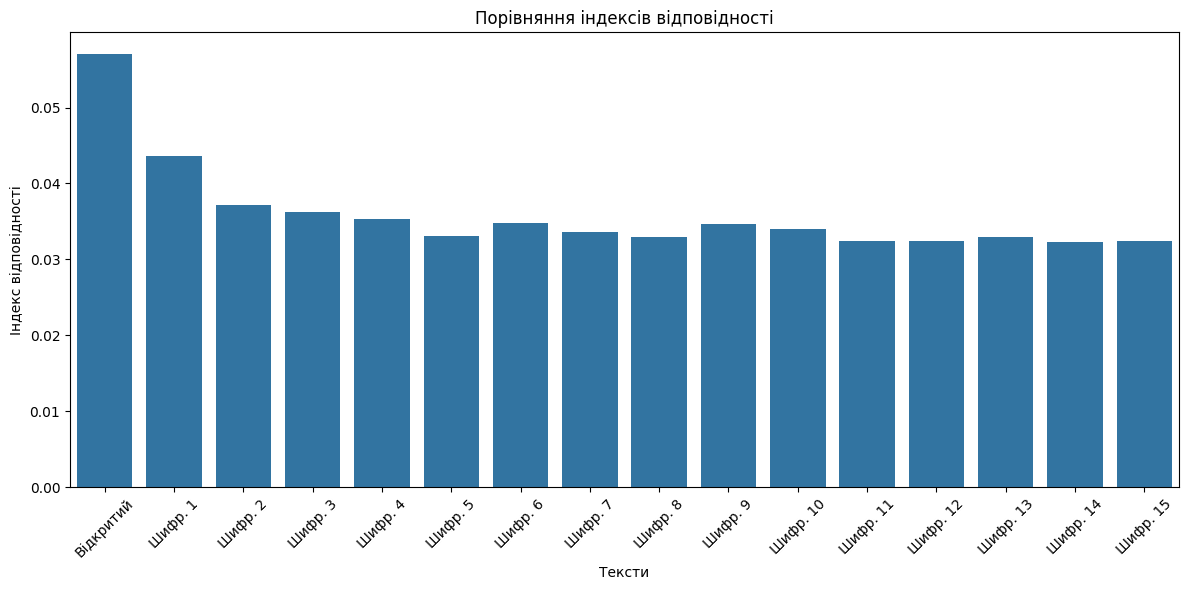

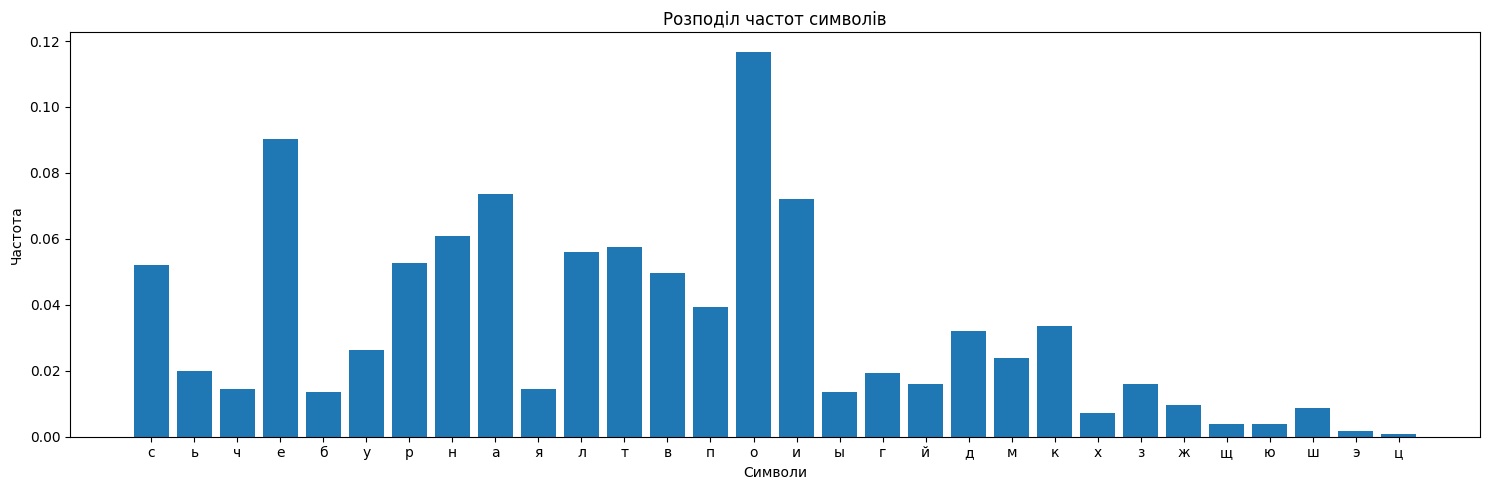

In [4]:
ciphertexts = [cipher.encrypt(plaintext, key) for key in keys]
ioc_plaintext = cipher.calculate_ioc(plaintext)
ioc_ciphertexts = [cipher.calculate_ioc(ciphertext) for ciphertext in ciphertexts]

print("\n[=] Індекси відповідності [=]")
print(f" [+] Відкритий текст: {ioc_plaintext:.10f}")
for i, ioc in enumerate(ioc_ciphertexts):
    print(f" [-] Шифротекст {i+1}: {ioc:.10f}")

# покзуємо результати візуально
visualizer.plot_ioc_comparison(ioc_plaintext, ioc_ciphertexts)
visualizer.plot_frequency_distribution(plaintext)

Аналіз варіанту (в нашому випадку - №2) та спроба розшифрування

In [5]:
print("\n[===] Аналіз варіанту №2 [===]")
encrypted_variant = processor.read_text(r'C:\Users\rdk\d_disk\5sem\cryptography\lab_2\v4.0\texts_variants\text_2.txt')
recommended_length, top_key_lengths = analyzer.find_key_length(encrypted_variant)

found_key = analyzer.find_key(encrypted_variant, recommended_length)
decrypted_text = cipher.decrypt(encrypted_variant, found_key)

print(f"\n[+] Знайдений ключ: {found_key}")
print(f"[+] Розшифрований текст (перші 200 символів): {decrypted_text[:200]}")


[===] Аналіз варіанту №2 [===]

[!] Топ-5 можливих довжин ключа [!]
 [+] Довжина 28: IOC = 0.055361
 [+] Довжина 14: IOC = 0.055283
 [+] Довжина 7: IOC = 0.044625
 [+] Довжина 21: IOC = 0.044470
 [+] Довжина 8: IOC = 0.036423

[✓] Рекомендована довжина ключа: 14

[+] Знайдений ключ: последнийдозор
[+] Розшифрований текст (перші 200 символів): какясмогэтосделатьспросилгесерипочемуэтогонесмогсделатьтымыстоялипосредибескрайнейсеройравнинывзгляднефиксироваляркихкрасоквцелойкартиненостоиловсмотретьсявотдельнуюпесчинкуитавспыхивалазолотомбагрянц


Додатковий аналіз з іншими довжинами ключа (щоб точно переконатися, що ми обрали оптимальний/правильний ключ)

In [ ]:
additional_results = []
additional_lengths = [length for length, _ in top_key_lengths[:5] if length != recommended_length]

for length in additional_lengths:
    print(f"\n{'=' * 30} Аналіз з довжиною {length} {'=' * 30}")
    key = analyzer.find_key(encrypted_variant, length)
    text = cipher.decrypt(encrypted_variant, key)
    additional_results.append((length, key, text))
    print(f"[+] Ключ: {key}")
    print(f"[+] Текст: {text[:50]}")


============================== Аналіз з довжиною 28 ==============================
[+] Ключ: последнийдозорпоследнийдозор
[+] Текст: какясмогэтосделатьспросилгесерипочемуэтогонесмогсд

============================== Аналіз з довжиною 7 ==============================
[+] Ключ: послздн
[+] Текст: какяпмоьшессоилатьппрзмыогпферипмчееорхонснесммгсэ

============================== Аналіз з довжиною 21 ==============================
[+] Ключ: мослздрпосоеднийслздн
[+] Текст: накяпмльшеоуоитетьппркмыогпсеримочемурхонсресммгоэ

============================== Аналіз з довжиною 8 ==============================
[+] Ключ: одозозои
[+] Текст: лкнгийнгштосдомжхгимппмдлжеъжчлтечдноътнгъомфреяри


Загальний аналіз

In [ ]:
print("\n" + "="*50)
print("Аналіз результатів:")
print("="*50)
print(f"1. Довжина відкритого тексту: {len(plaintext)} символів")
print(f"2. Кількість згенерованих ключів: {len(keys)}")
print("3. Довжини ключів:", ", ".join(map(str, key_lengths)))
print(f"4. Індекс відповідності відкритого тексту: {ioc_plaintext:.6f}")
print("5. Індекси відповідності шифротекстів:")
for i, ioc in enumerate(ioc_ciphertexts):
    print(f" Шифротекст {i+1}: {ioc:.6f}")
print("6. Можливі довжини ключа для варіанту (топ-5):")
for length, ioc in top_key_lengths[:5]:
    print(f" Довжина {length}: IOC = {ioc:.6f}")
print(f"7. Знайдений ключ для варіанту: {found_key}")
print(f"8. Довжина розшифрованого тексту: {len(decrypted_text)} символів")
print("="*50)


Аналіз результатів:
1. Довжина відкритого тексту: 1250 символів
2. Кількість згенерованих ключів: 15
3. Довжини ключів: 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20
4. Індекс відповідності відкритого тексту: 0.057048
5. Індекси відповідності шифротекстів:
 Шифротекст 1: 0.043593
 Шифротекст 2: 0.037220
 Шифротекст 3: 0.036231
 Шифротекст 4: 0.035319
 Шифротекст 5: 0.033144
 Шифротекст 6: 0.034790
 Шифротекст 7: 0.033556
 Шифротекст 8: 0.032899
 Шифротекст 9: 0.034604
 Шифротекст 10: 0.033971
 Шифротекст 11: 0.032404
 Шифротекст 12: 0.032389
 Шифротекст 13: 0.032931
 Шифротекст 14: 0.032296
 Шифротекст 15: 0.032477
6. Можливі довжини ключа для варіанту (топ-5):
 Довжина 28: IOC = 0.055361
 Довжина 14: IOC = 0.055283
 Довжина 7: IOC = 0.044625
 Довжина 21: IOC = 0.044470
 Довжина 8: IOC = 0.036423
7. Знайдений ключ для варіанту: последнийдозор
8. Довжина розшифрованого тексту: 7328 символів
